Examples of LEGO blocks randomly distributed on the picking surface of a part feeder

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

In [3]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import faai

For reference: https://www.bartneck.de/2019/04/21/lego-brick-dimensions-and-measurements/

In [4]:
def lego_brick():
    
    L = 31.8
    W = 15.8

    corners = np.array([[0, 0], [L, 0], [L, W], [0, W]])
    
    return corners.T


def viz_rectangle(corners, **fill_kwargs):    
    plt.fill(corners[0, :], corners[1, :], **fill_kwargs)
    
    
def generate_poses(n, xrange, yrange, random_seed=None):
    
    xmin, xmax = xrange
    ymin, ymax = yrange
    
    if random_seed is not None:
        np.random.seed(random_seed)
    
    gen = []
    
    for i in range(n):
    
        x = np.random.random() * (xmax - xmin) + xmin
        y = np.random.random() * (ymax - ymin) + ymin
        
        theta = np.random.random() * (2 * np.pi)
        
        triple = (x, y, theta)
        gen.append(triple)
        
    return pd.DataFrame(gen, columns=['x', 'y', 'theta'])

In [5]:
brick = lego_brick()
brick_h = faai.e2h(brick)

print(brick)
print()
print(brick_h)

[[ 0.  31.8 31.8  0. ]
 [ 0.   0.  15.8 15.8]]

[[ 0.  31.8 31.8  0. ]
 [ 0.   0.  15.8 15.8]
 [ 1.   1.   1.   1. ]]


In [6]:
faai.h2e(brick_h)

array([[ 0. , 31.8, 31.8,  0. ],
       [ 0. ,  0. , 15.8, 15.8]])

In [7]:
poses_df = generate_poses(10, (30, 350), (30, 210), random_seed=700)

poses_df

,x,y,theta
0,80.094837,105.036572,0.419760
1,306.930045,84.412678,4.657448
2,161.332884,92.124450,6.097117
3,302.813843,133.623319,4.682880
4,249.243057,97.415066,1.160088
5,120.528584,166.939606,3.840769
6,205.165249,157.944459,3.680697
7,340.885588,200.224320,3.246311
8,240.636768,173.087319,2.558557
9,276.250854,43.806618,4.104660


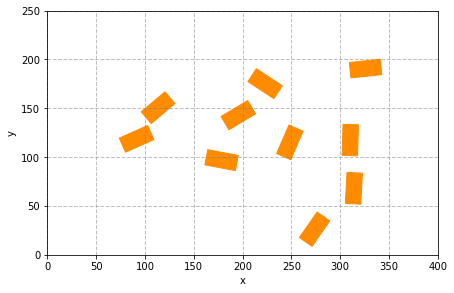

In [8]:
brick = lego_brick()
brick_h = faai.e2h(brick)

plt.figure(figsize=(7, 7))

plt.axis('equal')
plt.gca().set_adjustable('box')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.xlim((0, 400))
plt.ylim((0, 250))

for _, row in poses_df.iterrows():
    
    x, y, theta = row
    
    T = faai.se2([x, y], theta)

    brick_transformed_h = np.dot(T, brick_h)
    brick_transformed = faai.h2e(brick_transformed_h)
    viz_rectangle(brick_transformed, color='darkorange')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

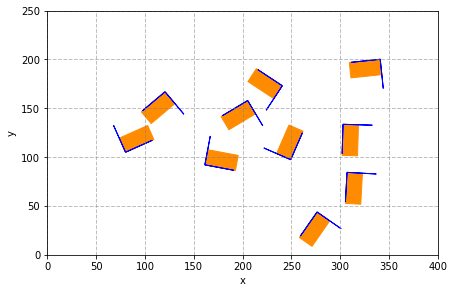

In [9]:
brick = lego_brick()
brick_h = faai.e2h(brick)

plt.figure(figsize=(7, 7))

plt.axis('equal')
plt.gca().set_adjustable('box')
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.xlim((0, 400))
plt.ylim((0, 250))

for _, row in poses_df.iterrows():
    
    x, y, theta = row
    
    T = faai.se2([x, y], theta)

    brick_transformed_h = np.dot(T, brick_h)
    brick_transformed = faai.h2e(brick_transformed_h)
    viz_rectangle(brick_transformed, color='darkorange')
    
    faai.plot_frame(T, c='b', scale_factor=30)

plt.xlabel('x')
plt.ylabel('y')

plt.show()